In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib
import missingno as msno
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

In [3]:
df_raw = pd.read_csv("/media/d1/Projects/LoanApproval/data/eda_done.csv")

## Data Description

In [4]:
pd.set_option('display.max_columns',None)
df_raw.head()

,Unnamed: 0,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,36 months,11.44,329.48,B,B4,marketing,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,OK 22690
1,1,36 months,11.99,265.68,B,B5,analyst,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,SD 05113
2,2,36 months,10.49,506.97,B,B3,Miscellanous,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,WV 05113
3,3,36 months,6.49,220.65,A,A2,Miscellanous,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,MA 00813
4,4,60 months,17.27,609.33,C,C5,Miscellanous,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,VA 11650


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

## Null Value Presence

<Axes: >

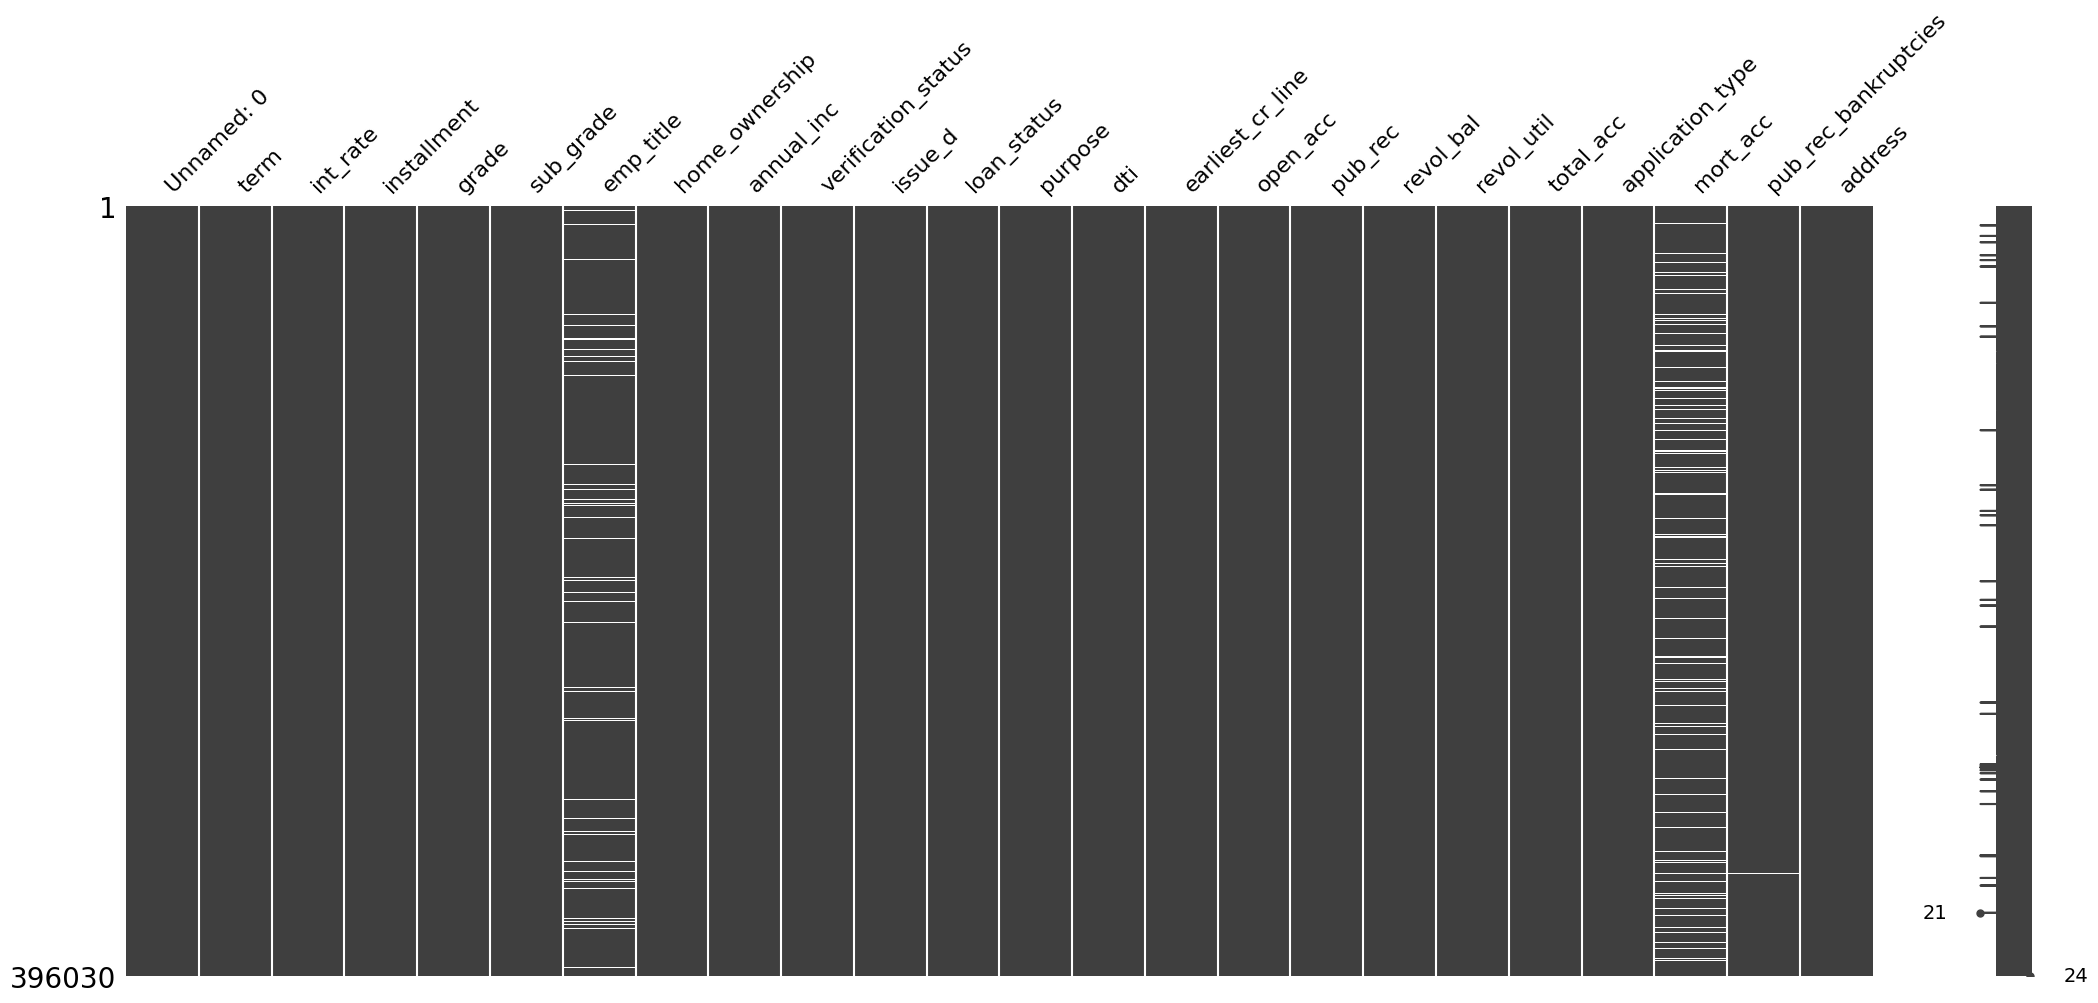

In [6]:
msno.matrix(df_raw)

In [7]:
df_raw.isna().mean().sort_values(ascending=False)

mort_acc                0.095435
emp_title               0.057892
pub_rec_bankruptcies    0.001351
revol_util              0.000697
Unnamed: 0              0.000000
dti                     0.000000
application_type        0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
purpose                 0.000000
term                    0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
address                 0.000000
dtype: float64

# Feature Engineering

In [8]:
df = df_raw.copy()

## Encoding Target Variable

In [9]:
df.head

,Unnamed: 0,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,36 months,11.44,329.48,B,B4,marketing,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,OK 22690
1,1,36 months,11.99,265.68,B,B5,analyst,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,SD 05113
2,2,36 months,10.49,506.97,B,B3,Miscellanous,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,WV 05113
3,3,36 months,6.49,220.65,A,A2,Miscellanous,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,MA 00813
4,4,60 months,17.27,609.33,C,C5,Miscellanous,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,VA 11650


In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.803871
1    0.196129
Name: proportion, dtype: float64

So, clearly it's an imbalanced data. We will deal with this later.

## Dealing with "emp_title"

In [23]:
def smooth_target_encode(df, cat_name, target, weight):
    ## global mean 
    mean = df[target].mean()

    ## counts and mean groupwise
    agg = df.groupby(cat_name)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    ## 'smoothed' means
    smooth = (counts*means + weight* mean) / (counts+weight)

    ## Replacing each string by corresponding smmothed means
    return df[cat_name].map(smooth)

In [24]:
df['emp_title_encoded'] = smooth_target_encode(df,cat_name = 'emp_title', target = 'loan_status', weight = 6)

In [25]:
df['emp_title_encoded'][:10]

0    0.204615
1    0.157453
2    0.184849
3    0.184849
4    0.184849
5    0.184849
6    0.144403
7    0.184849
8    0.184849
9    0.184849
Name: emp_title_encoded, dtype: float64

In [27]:
df.drop(['emp_title'], axis=1, inplace=True)

## Object Columns

In [35]:
df.select_dtypes(include = ['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'application_type',
       'address'],
      dtype='object')

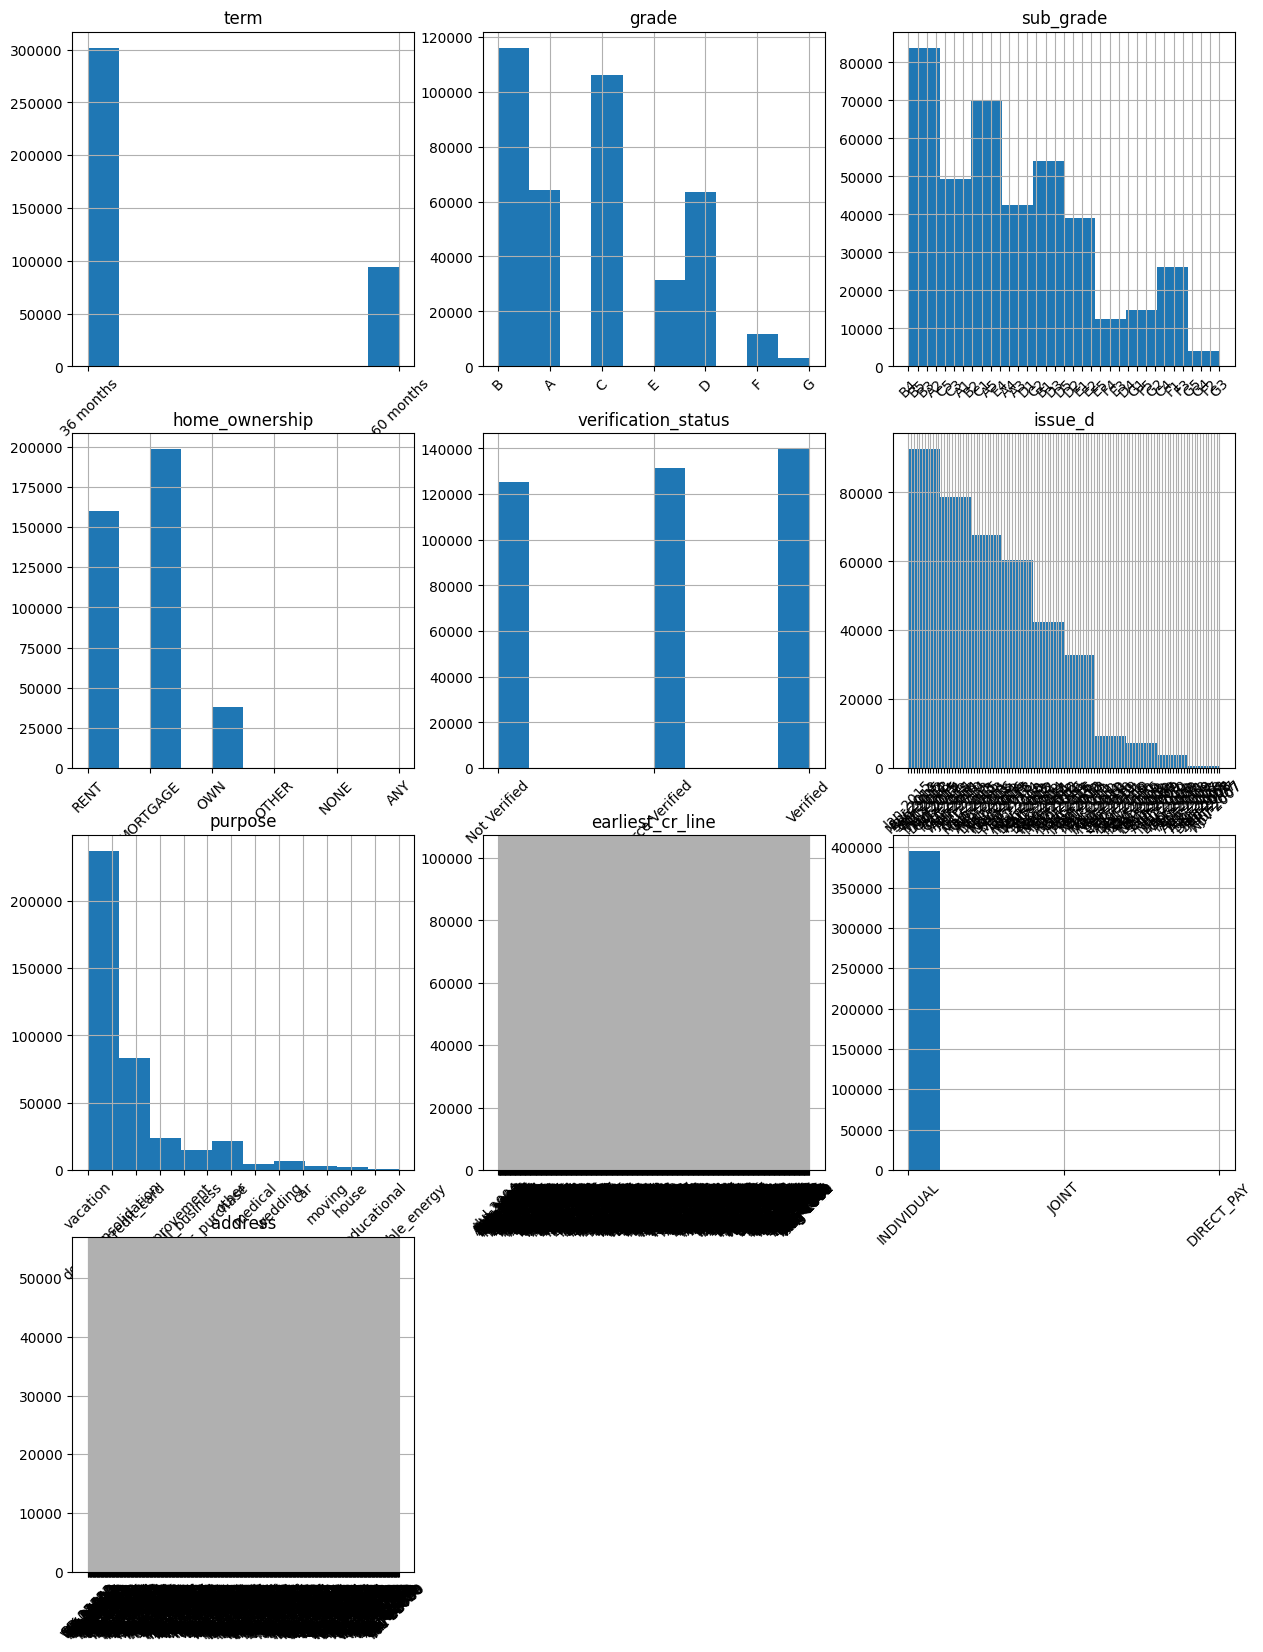

In [36]:
plt.figure(figsize=(15,20))
for i,column in enumerate(df[df.select_dtypes(include=['object']).columns]):
    plt.subplot(4,3,i+1)
    df[column].hist()
    plt.xticks(rotation = 45)
    plt.title(column)

As we can see, for columns like earliest_credit_line and issue dates and address, there are huge amount of categories, so lets deal with these first.

## Managing earliest_cr_line

We are gonna use the difference between the earliest credit line and todays date instead of earliest credit line column, to be able to use a numeric column.

In [37]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['days_to_earliest_cr_line'] = pd.Timestamp.now().normalize() - df['earliest_cr_line']
df['days_to_earliest_cr_line'][:10]

/tmp/ipykernel_21100/3109424095.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


0   12070 days
1    6926 days
2    5800 days
3    6134 days
4    8875 days
5    6742 days
6    6530 days
7   10517 days
8   10609 days
9    9330 days
Name: days_to_earliest_cr_line, dtype: timedelta64[ns]

In [38]:
df['days_to_earliest_cr_line'] = df['days_to_earliest_cr_line'].astype('str')
df['days_to_earliest_cr_line'] = df['days_to_earliest_cr_line'].apply(lambda x : x.strip(' days 00:00:00'))
df['days_to_earliest_cr_line'] = df['days_to_earliest_cr_line'].astype('int64')
df['days_to_earliest_cr_line'][:10]

0     1207
1     6926
2       58
3     6134
4     8875
5     6742
6      653
7    10517
8    10609
9      933
Name: days_to_earliest_cr_line, dtype: int64

In [39]:
df.drop(['earliest_cr_line'], axis = 1, inplace=True)

## Similarly managing the Issue_Date:

In [40]:
## finding the difference
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['days_to_issue_d'] = pd.Timestamp.now().normalize() - df['issue_d']

##finalizing the column
df['days_to_issue_d'] = df['days_to_issue_d'].astype('str')
df['days_to_issue_d'] = df['days_to_issue_d'].apply(lambda x : x.strip(' days 00:00:00'))
df['days_to_issue_d'] = df['days_to_issue_d'].astype('int64')
df['days_to_issue_d'][:10]

/tmp/ipykernel_21100/2396550439.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])


0     309
1     309
2     309
3    3151
4     373
5    2847
6    2847
7    3942
8    3182
9    4095
Name: days_to_issue_d, dtype: int64

In [41]:
df.drop(['issue_d'], axis=1, inplace=True)

In [42]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'application_type', 'address'],
      dtype='object')

## Managing Home Onership column

In [43]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

So, lets merge 'OTHER' and 'ANY' and  'NONE'

In [44]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [424]:
df.columns

Index(['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'emp_title_encoded',
       'days_to_earliest_cr_line', 'days_to_issue_d'],
      dtype='object')

## Managing 'term'

In [46]:
df['term'].value_counts()

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

In [47]:
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df.term.map(term_values)

In [48]:
df.term.value_counts()

term
36    302005
60     94025
Name: count, dtype: int64

## Managing 'subgrade'

In [49]:
df['sub_grade'].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

Mapping

In [50]:
values = sorted(df['sub_grade'].unique())
dicts = {}
keys = range(35)
for i in keys:
        dicts[values[i]] = i
print(dicts)

{'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34}


In [51]:
df['sub_grade'] = df['sub_grade'].map(dicts)
df['sub_grade'].value_counts()

sub_grade
7     26655
8     25601
10    23662
11    22580
6     22495
9     22085
12    21221
13    20280
5     19182
4     18526
14    18244
15    15993
3     15789
16    13951
17    12223
18    11657
2     10576
0      9729
19     9700
1      9567
20     7917
21     7431
22     6207
23     5361
24     4572
25     3536
26     2766
27     2286
28     1787
29     1397
30     1058
31      754
32      552
33      374
34      316
Name: count, dtype: int64

As subgrade is just a detailed version of grade, so lets remove grade

In [61]:
df.drop(['grade'], axis=1, inplace=True)

## Managing Purpose

In [52]:
df['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

### **Frequency Encoding**
As the frequencies of different column values are not close to each other, lets apply Frequency Encoding

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,address,emp_title_encoded,days_to_earliest_cr_line,days_to_issue_d,purpose_freq_encode
0,36,11.44,329.48,B,8,RENT,117000.0,Not Verified,0,26.24,16.0,0.0,36369.0,41.8,25.0,INDIVIDUAL,0.0,0.0,OK 22690,0.204615,1207,309,0.006191
1,36,11.99,265.68,B,9,MORTGAGE,65000.0,Not Verified,0,22.05,17.0,0.0,20131.0,53.3,27.0,INDIVIDUAL,3.0,0.0,SD 05113,0.157453,6926,309,0.592145
2,36,10.49,506.97,B,7,RENT,43057.0,Source Verified,0,12.79,13.0,0.0,11987.0,92.2,26.0,INDIVIDUAL,0.0,0.0,WV 05113,0.184849,58,309,0.209628
3,36,6.49,220.65,A,1,RENT,54000.0,Not Verified,0,2.60,6.0,0.0,5472.0,21.5,13.0,INDIVIDUAL,0.0,0.0,MA 00813,0.184849,6134,3151,0.209628
4,60,17.27,609.33,C,14,MORTGAGE,55000.0,Verified,1,33.95,13.0,0.0,24584.0,69.8,43.0,INDIVIDUAL,1.0,0.0,VA 11650,0.184849,8875,373,0.209628


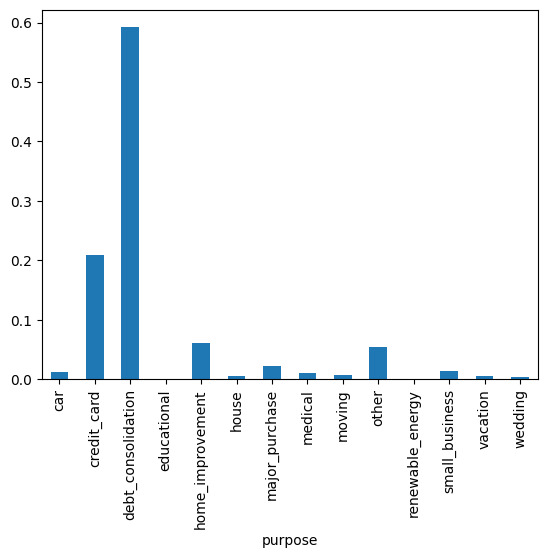

In [53]:
# grouping by frequency
fq = df.groupby('purpose').size()/len(df)
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('purpose')] = df['purpose'].map(fq)
# drop original column.
df = df.drop(['purpose'], axis=1)
fq.plot.bar(stacked=True)
df.head()

## Managing ApplicationType

In [54]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [55]:
df['application_type'].replace(['JOINT','DIRECT_PAY'],'OTHERS',inplace=True)

In [56]:
df['application_type'] = df['application_type'].map({'INDIVIDUAL':1,'OTHERS':0})
df['application_type'].value_counts()

application_type
1    395319
0       711
Name: count, dtype: int64

## Managing 'address'

In [57]:
df['address'].value_counts()

address
AP 70466    2169
AE 22690    2110
AP 22690    2091
AE 48052    2026
AE 30723    2018
            ... 
NH 86630     167
NC 93700     167
NM 11650     166
UT 86630     163
ND 93700     158
Name: count, Length: 540, dtype: int64

#### **Frequency Encode**

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,emp_title_encoded,days_to_earliest_cr_line,days_to_issue_d,purpose_freq_encode,address_freq_encode
0,36,11.44,329.48,B,8,RENT,117000.0,Not Verified,0,26.24,16.0,0.0,36369.0,41.8,25.0,1,0.0,0.0,0.204615,1207,309,0.006191,0.002457
1,36,11.99,265.68,B,9,MORTGAGE,65000.0,Not Verified,0,22.05,17.0,0.0,20131.0,53.3,27.0,1,3.0,0.0,0.157453,6926,309,0.592145,0.001980
2,36,10.49,506.97,B,7,RENT,43057.0,Source Verified,0,12.79,13.0,0.0,11987.0,92.2,26.0,1,0.0,0.0,0.184849,58,309,0.209628,0.001995
3,36,6.49,220.65,A,1,RENT,54000.0,Not Verified,0,2.60,6.0,0.0,5472.0,21.5,13.0,1,0.0,0.0,0.184849,6134,3151,0.209628,0.002096
4,60,17.27,609.33,C,14,MORTGAGE,55000.0,Verified,1,33.95,13.0,0.0,24584.0,69.8,43.0,1,1.0,0.0,0.184849,8875,373,0.209628,0.000470


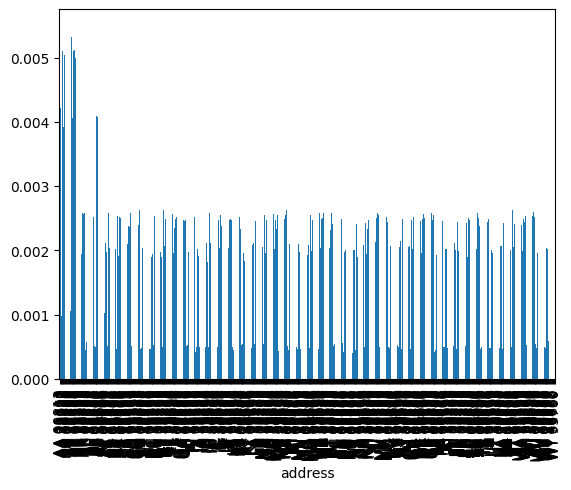

In [58]:
# grouping by frequency
fq = df.groupby('address').size()/len(df)
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('address')] = df['address'].map(fq)
# drop original column.
df = df.drop(['address'], axis=1)
fq.plot.bar(stacked=True)
df.head()

## One Hot Encoding 2 remaining Object type columns

In [62]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status'], dtype='object')

In [63]:
df_encoded = pd.get_dummies(df,columns=list(df.select_dtypes('object').columns),drop_first=True)

In [64]:
len(df_encoded.columns)

25

In [66]:
df_encoded.head()

,term,int_rate,installment,sub_grade,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,emp_title_encoded,days_to_earliest_cr_line,days_to_issue_d,purpose_freq_encode,address_freq_encode,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,36,11.44,329.48,8,117000.0,0,26.24,16.0,0.0,36369.0,41.8,25.0,1,0.0,0.0,0.204615,1207,309,0.006191,0.002457,False,False,True,False,False
1,36,11.99,265.68,9,65000.0,0,22.05,17.0,0.0,20131.0,53.3,27.0,1,3.0,0.0,0.157453,6926,309,0.592145,0.001980,False,False,False,False,False
2,36,10.49,506.97,7,43057.0,0,12.79,13.0,0.0,11987.0,92.2,26.0,1,0.0,0.0,0.184849,58,309,0.209628,0.001995,False,False,True,True,False
3,36,6.49,220.65,1,54000.0,0,2.60,6.0,0.0,5472.0,21.5,13.0,1,0.0,0.0,0.184849,6134,3151,0.209628,0.002096,False,False,True,False,False
4,60,17.27,609.33,14,55000.0,1,33.95,13.0,0.0,24584.0,69.8,43.0,1,1.0,0.0,0.184849,8875,373,0.209628,0.000470,False,False,False,False,True


## Train Test Split

In [72]:
y = df_encoded['loan_status']
X = df_encoded.drop('loan_status', axis=1, inplace=False)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle = True)

In [121]:
X_train.shape

(297022, 24)

In [122]:
X_test.shape

(99008, 24)

In [123]:
X_train.head()

,term,int_rate,installment,sub_grade,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,emp_title_encoded,days_to_earliest_cr_line,days_to_issue_d,purpose_freq_encode,address_freq_encode,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
141650,36,6.03,486.97,0,75000.0,12.00,12.0,0.0,11058.0,19.4,31.0,1,4.0,0.0,0.184849,10122,3182,0.209628,0.002386,False,False,False,False,False
109688,36,5.32,332.77,0,60000.0,11.06,11.0,0.0,8891.0,29.7,19.0,1,2.0,0.0,0.184849,6346,2847,0.592145,0.001914,False,False,True,False,False
149438,60,17.86,789.91,19,85000.0,19.15,15.0,0.0,28670.0,71.3,45.0,1,0.0,0.0,0.256226,7991,2786,0.592145,0.002538,False,False,True,True,False
225983,36,11.53,824.76,9,125000.0,19.30,18.0,2.0,17921.0,54.5,31.0,1,3.0,0.0,0.197861,8995,297,0.592145,0.002470,False,False,False,True,False
347845,36,10.16,375.98,5,57700.0,33.34,12.0,0.0,30512.0,71.8,35.0,1,6.0,0.0,0.184849,8569,3851,0.592145,0.005035,False,False,False,False,True


In [124]:
final_columns = X_train.columns

In [125]:
y_train[:10]

141650    0
109688    0
149438    0
225983    0
347845    0
48439     0
207606    1
86587     0
280358    1
344503    0
Name: loan_status, dtype: int64

## Null Value Imputation (KNN)

## Standardizations

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)

In [128]:
pd.DataFrame(X_test).isna().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9       73
10       0
11       0
12    9432
13     120
14    5720
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
dtype: int64

In [129]:
X_test = imputer.transform(X_test)

## Treating Outliers

In [130]:
X_train_df = pd.DataFrame(X_train)
X_train_df.shape

(297022, 24)

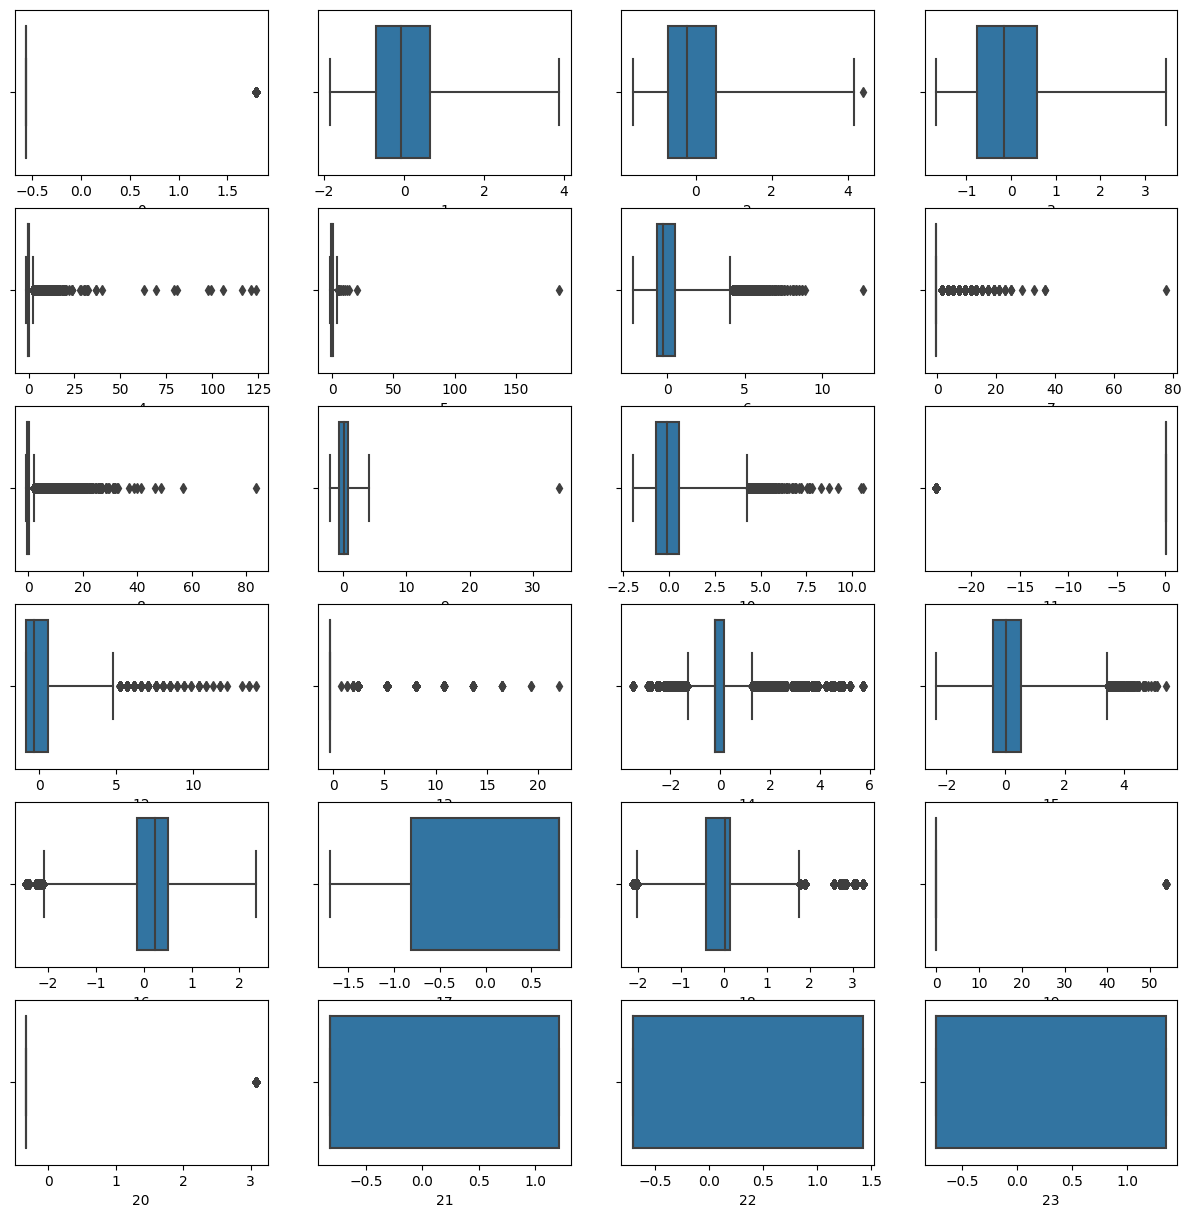

In [131]:
plt.figure(figsize =(15,15))
X_train_df = pd.DataFrame(X_train)
features = X_train_df.columns
for i,column in enumerate(features):
    plt.subplot(6,4,i+1)
    sns.boxplot(data = X_train_df, x = column, whis=3.0) ### Keeping the whiskers a bit large to reduce outliers labels a bit

In [132]:
for col in features:
    mean = X_train_df[col].mean()
    std = X_train_df[col].std()

    upper_limit = mean+3*std
    lower_limit = mean-3*std

    X_train_df = X_train_df[(X_train_df[col]<upper_limit) & (X_train_df[col]>lower_limit)]

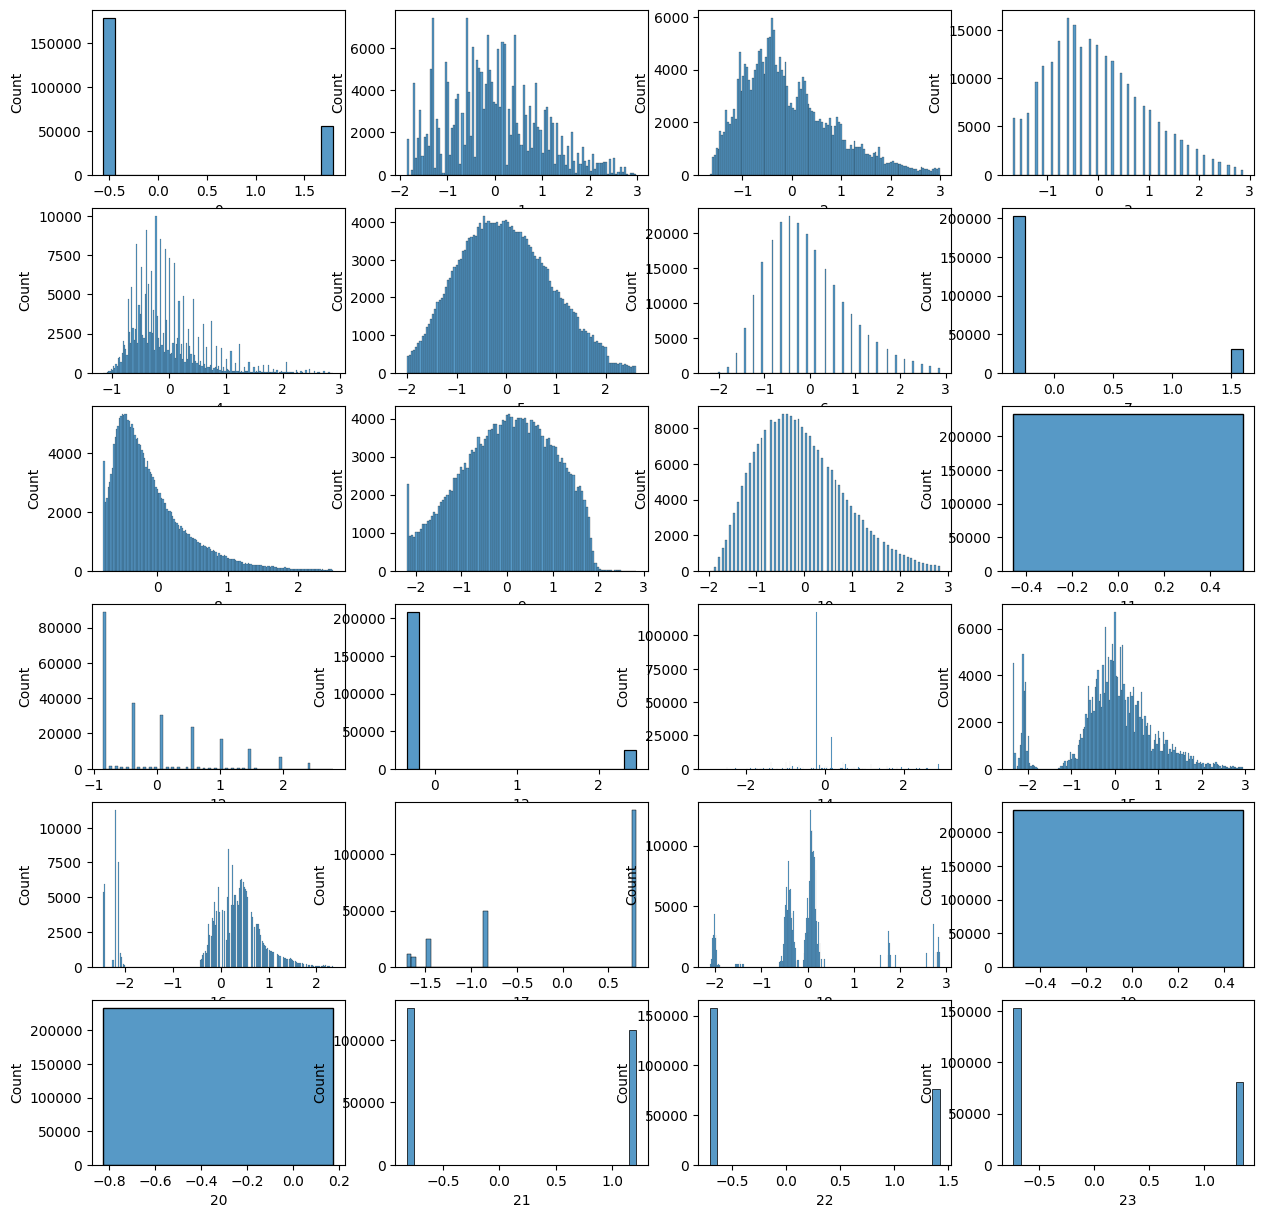

In [133]:
plt.figure(figsize =(15,15))
for i,column in enumerate(features):
    plt.subplot(6,4,i+1)
    sns.histplot(data = X_train_df,x = column)

## Dealing with Imbalance Data

Lets look at the distribution of y values.

In [134]:
y_train.value_counts(normalize=True)

loan_status
0    0.804001
1    0.195999
Name: proportion, dtype: float64

As we can clearly see that there is a 80 20 splitting among the y values for 2 classes, which is a large imbalance. To deal with this we are going to use Oversampling with SMOTE

### SMOTE

In [135]:

sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [136]:
y_train_sm.value_counts()

loan_status
0    238806
1    238806
Name: count, dtype: int64

# Model Building

## LogisticRegression

In [137]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Hyperparameter Tuning

In [138]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'], 'C':[0.00001,0.001,0.01,0.1,1,5,10,20], 'max_iter':[1000]}
logreg_tuned = GridSearchCV(logreg, param_grid=parameter, scoring='f1', cv=5, verbose=3)

In [139]:
logreg_tuned.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..C=1e-05, max_iter=1000, penalty=l1;, score=nan total time=   0.1s
[CV 2/5] END ..C=1e-05, max_iter=1000, penalty=l1;, score=nan total time=   0.1s


[CV 3/5] END ..C=1e-05, max_iter=1000, penalty=l1;, score=nan total time=   0.1s
[CV 4/5] END ..C=1e-05, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..C=1e-05, max_iter=1000, penalty=l1;, score=nan total time=   0.1s
[CV 1/5] END C=1e-05, max_iter=1000, penalty=l2;, score=0.697 total time=   1.3s
[CV 2/5] END C=1e-05, max_iter=1000, penalty=l2;, score=0.705 total time=   1.2s
[CV 3/5] END C=1e-05, max_iter=1000, penalty=l2;, score=0.702 total time=   1.2s
[CV 4/5] END C=1e-05, max_iter=1000, penalty=l2;, score=0.705 total time=   1.7s
[CV 5/5] END C=1e-05, max_iter=1000, penalty=l2;, score=0.702 total time=   1.3s
[CV 1/5] END C=1e-05, max_iter=1000, penalty=elasticnet;, score=nan total time=   0.1s
[CV 2/5] END C=1e-05, max_iter=1000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END C=1e-05, max_iter=1000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END C=1e-05, max_iter=1000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 

/media/d1/Projects/LoanApproval/loan_py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/media/d1/Projects/LoanApproval/loan_py310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/media/d1/Projects/LoanApproval/loan_py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/media/d1/Projects/LoanApproval/loan_py310/l

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.01, 0.1, 1, 5, 10, 20],
                         'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1', verbose=3)

In [143]:
print(logreg_tuned.best_params_)

{'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


In [145]:
f1 = print(logreg_tuned.best_score_)
f1

0.7062632951548421


### Coefficients

In [148]:
coeffs = logreg_tuned.best_estimator_.coef_[0]
cols = final_columns
column_coeffs = pd.DataFrame({'columns':cols,
                                'coefficients' : coeffs})
column_coeffs.sort_values(by='coefficients',ascending= False)

,columns,coefficients
3,sub_grade,0.538410
5,dti,0.209058
0,term,0.196800
14,emp_title_encoded,0.163189
6,open_acc,0.143397
9,revol_util,0.117919
21,home_ownership_RENT,0.095039
22,verification_status_Source Verified,0.085134
2,installment,0.074868
23,verification_status_Verified,0.057269


## Prediction

In [149]:
y_pred = logreg_tuned.predict(X_test)

> ## Performance Metrics

### Confusion Matrix

In [150]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm

array([[58075, 21476],
       [ 6094, 13363]])

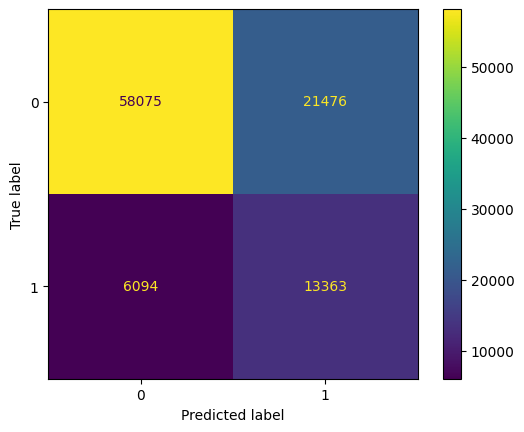

In [151]:
ConfusionMatrixDisplay(cm).plot()

In [152]:
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

### Accuracy

Ratio of summation of True Negative and True Positive over summation of TP, FP, TN, FN

In [153]:
acc = cm.diagonal().sum() / cm.sum()
acc

0.7215376535229476

Accuracy Can be used as a proper scoring metric here as the data is balanced.

### Precision
Precision = True Positive / Total Predicted Positives = TP / ( TP + FP )

In [154]:
precision = cm[1][1] / (cm[0][1] + cm[1][1])
precision

0.38356439622262406

### Recall
Recall = True Positives / Total Actual Positives = TP / ( FN + TP )

In [155]:
recall = cm[1][1] / ( cm[1][0] + cm[1][1] )
recall

0.6867965256719947

AS, we can see that recall score is better than precision. Means the model is better at minimizing the FNs or Type 1 Error. The error made while labelling the good customers as bad, is minimized well. So, the model will help the bank maintain their credability to the customers, lower risk of defaulters. But comparatively low precision will push the bank at risk of loosing potential good customers. 

### f1_SCORE

In [156]:
f1_score = 2*recall*precision / (recall  +  precision)
f1_score

0.49222778841903636

### Classification Report

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81     79551
           1       0.38      0.69      0.49     19457

    accuracy                           0.72     99008
   macro avg       0.64      0.71      0.65     99008
weighted avg       0.80      0.72      0.75     99008



### ROC and AUC

In [158]:
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TPR = 1 - FNR

In [159]:
from sklearn.metrics import roc_curve, roc_auc_score
model_auc = roc_auc_score(y_test, y_pred)
model_auc

0.7084156730508281

In [161]:
model_probs = logreg_tuned.predict_proba(X_test)
model_fpr, model_tpr, _ = roc_curve(y_test.values, model_probs[:,1])

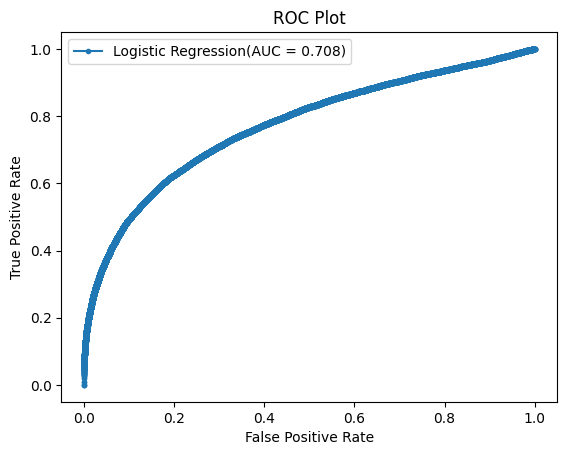

In [162]:
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression(AUC = %0.3f)' % model_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [163]:
import pickle
# pickle.dump(logreg, open('model/logreg.pkl','wb'))

In [164]:
# pickle.dump(scaler, open('model/scaler.pkl','wb'))